In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
# Define moving average function 
def simple_moving_average(w,x):
    return np.convolve(x, np.ones(w), "valid") / w

In [7]:
import numpy as np

# Replace with your actual cumulative values
cumulative_data = pd.read_csv("../params/raw_data.csv")
cumulative = cumulative_data["Cumulative Orchards"]
months=cumulative_data["Month"]
cumulative = np.array(list(cumulative))
incidence = np.diff(np.insert(cumulative, 0, 0))  # insert 0 at start, then take diff

In [8]:
x = np.arange(len(incidence))  # 0 through 13
y = incidence
print(y)

[ 50  25  22  16  10  15  86  88 111 467  48  31 101  71]


In [9]:
from pandas import Series

window =2
real_inc = [incidence[i] for i in range(0,len(incidence))]
ma_smoothed = Series(real_inc[1:]).rolling(window, center=False).mean().values
ma_smoothed = list(ma_smoothed)
#ma_smoothed[0] = 50
#ma_smoothed[1] = 25
ma_smoothed = [x for x in ma_smoothed[1:]]
# All values
window_df = pd.DataFrame()
ma_smoothed = real_inc[0:2] + ma_smoothed
window_df["Month"] = months
window_df["Delta Orchard"] = ma_smoothed
window_inc = ma_smoothed
all_vals = []
total_val = 0
for i in window_inc:
    total_val += i
    all_vals.append(total_val)
#all_vals[1] = 25
window_df["Cumulative Orchards"] = all_vals
window_df.to_csv("../params/window_psa.csv")

In [10]:
print(window_df)

     Month  Delta Orchard  Cumulative Orchards
0   11-Feb           50.0                 50.0
1   11-Mar           25.0                 75.0
2   11-Apr           23.5                 98.5
3   11-May           19.0                117.5
4   11-Jun           13.0                130.5
5   11-Jul           12.5                143.0
6   11-Aug           50.5                193.5
7   11-Sep           87.0                280.5
8   11-Oct           99.5                380.0
9   11-Nov          289.0                669.0
10  11-Dec          257.5                926.5
11  12-Jan           39.5                966.0
12  12-Feb           66.0               1032.0
13  12-Mar           86.0               1118.0


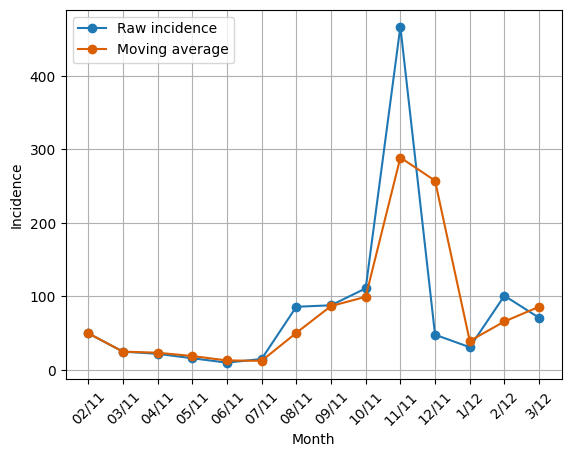

In [11]:
import matplotlib.pyplot as plt
x = ["02/11","03/11","04/11","05/11","06/11","07/11","08/11","09/11","10/11","11/11","12/11","1/12","2/12","3/12"]
colors = ['#1f78b4','#d95f02']
plt.plot(x, y, color=colors[0],marker="o",label='Raw incidence')
plt.plot(x, ma_smoothed,color=colors[1],marker="o", label='Moving average')
#plt.plot(x, logistic_incidence, 'go-', label='Logistic-derived')
#plt.plot(x, gamma_fit, 'r--', label='Gamma fit')
#plt.plot(x, lognorm_fit, 'm--', label='Log-normal fit')
#plt.plot(x, syn_inc, 'o--', label='Synthetic')

plt.tick_params(axis='x', labelrotation=45)

plt.xlabel("Month")
plt.ylabel("Incidence")
#plt.title("Comparison of Reference Incidence Curves")
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig("figs/ref_curves.png")